# Flora Prepper Model Evaluation
## Initialize the environment

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
import pandas as pd

# Import custom modelling code
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.models.run_model import *
from src.visualization.visualize import *
import src.features as features

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jocelynpender/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Import and visualize the data
### Visualize counts of training datasets

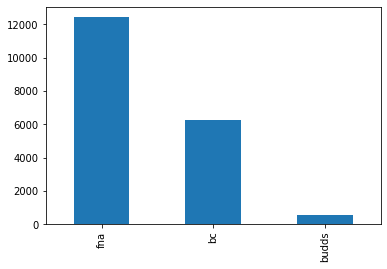

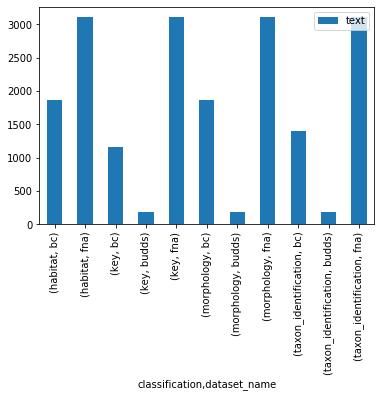

In [2]:
flora_data_frame = pd.read_csv("../data/processed/flora_data_frame_full.csv", index_col=0)
flora_data_frame['dataset_name'].value_counts().plot.bar()
plt.show()
flora_data_frame[['classification', 'dataset_name', 'text']] \
.groupby(['classification', 'dataset_name']).count().plot.bar()


### View a word cloud for all text data 
Text is processed using the same custom (bare-bones) tokenizer and stopwords used to train the model. 


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jocelynpender/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


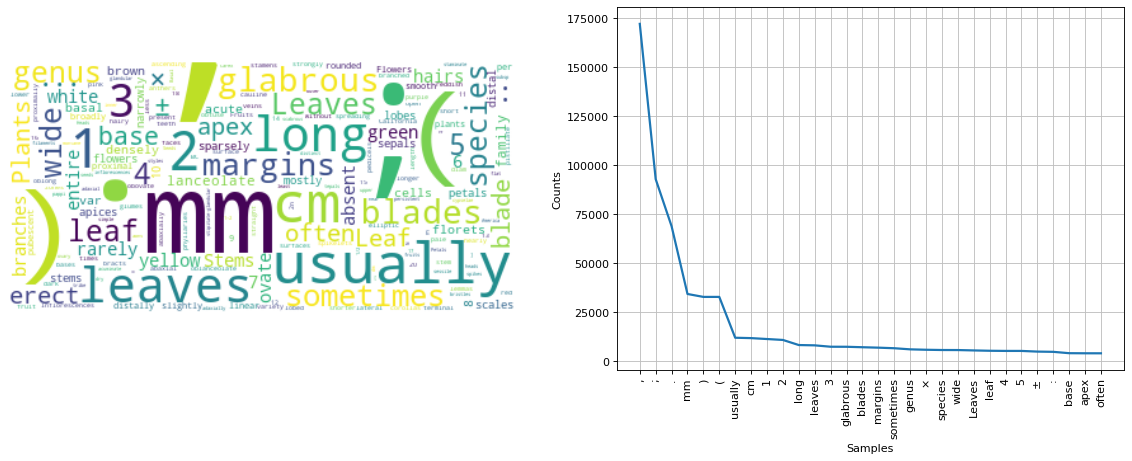

<Figure size 432x288 with 0 Axes>

[(',', 172269), (';', 93017), ('.', 68995), ('mm', 34421), (')', 32931), ('(', 32930), ('usually', 12095), ('cm', 11899), ('1', 11435), ('2', 10967), ('long', 8364), ('leaves', 8211), ('3', 7506), ('glabrous', 7482), ('blades', 7248), ('margins', 7030), ('sometimes', 6739), ('genus', 6169), ('×', 5961), ('species', 5832), ('wide', 5809), ('Leaves', 5616), ('leaf', 5447), ('4', 5368), ('5', 5365), ('±', 5023), (':', 4899), ('base', 4206), ('apex', 4159), ('often', 4150)]


In [3]:
tokenized_stop_words = features.prepare_stop_words(custom_stop_words=["unknown", "accepted", "synonym",
                                                             "basionym", "source",
                                                             "note", "notes", "morphology", "fna_id"])  # Find a way to keep numbers and elipses!
# morphology word is an artefact of the FNA xml key statements. 
# TODO Return to this and fix
text = " ".join(text_string for text_string in flora_data_frame.text)
visualize_words(text, tokenized_stop_words)

#### What does the word cloud look like if we apply a strict preprocessing cleaning regime?

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jocelynpender/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


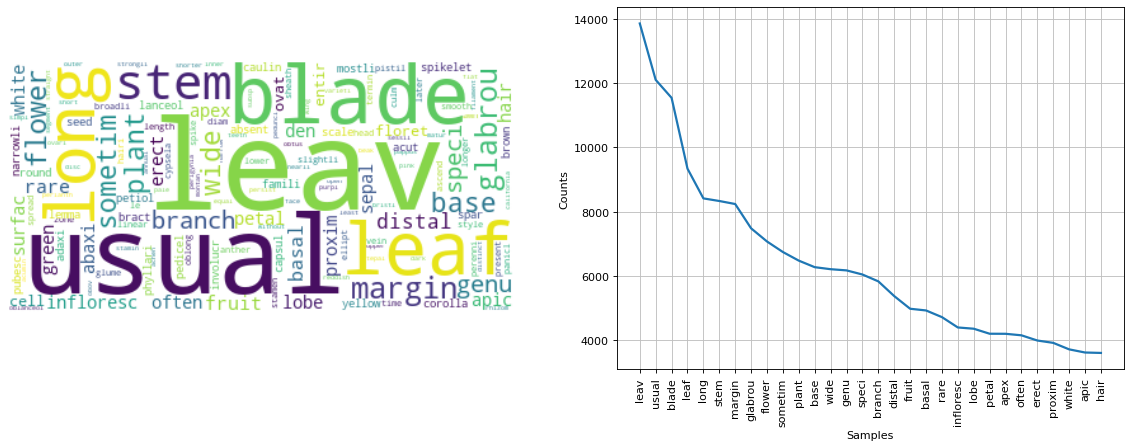

<Figure size 432x288 with 0 Axes>

[('leav', 13854), ('usual', 12101), ('blade', 11541), ('leaf', 9339), ('long', 8414), ('stem', 8333), ('margin', 8239), ('glabrou', 7483), ('flower', 7074), ('sometim', 6746), ('plant', 6478), ('base', 6275), ('wide', 6212), ('genu', 6175), ('speci', 6047), ('branch', 5834), ('distal', 5376), ('fruit', 4982), ('basal', 4929), ('rare', 4722), ('infloresc', 4400), ('lobe', 4361), ('petal', 4205), ('apex', 4203), ('often', 4156), ('erect', 3994), ('proxim', 3921), ('white', 3719), ('apic', 3621), ('hair', 3608)]


In [4]:
tokenized_stop_words_clean = features.prepare_stop_words(custom_stop_words=["unknown", "accepted", "synonym",
                                                             "basionym", "source",
                                                             "note", "notes", "morphology", "fna_id"], clean=True) 
visualize_words(text, tokenized_stop_words_clean, cleanup=True)

### Generate word clouds by classification.
Are there any noticeable differences between the words used most frequently between the classifications?

In [5]:
taxon_identification = " ".join(text_string for text_string in flora_data_frame[flora_data_frame.classification == "taxon_identification"].text)
morphology = " ".join(text_string for text_string in flora_data_frame[flora_data_frame.classification == "morphology"].text)
key = " ".join(text_string for text_string in flora_data_frame[flora_data_frame.classification == "key"].text)
habitat = " ".join(text_string for text_string in flora_data_frame[flora_data_frame.classification == "habitat"].text)

Taxon identification

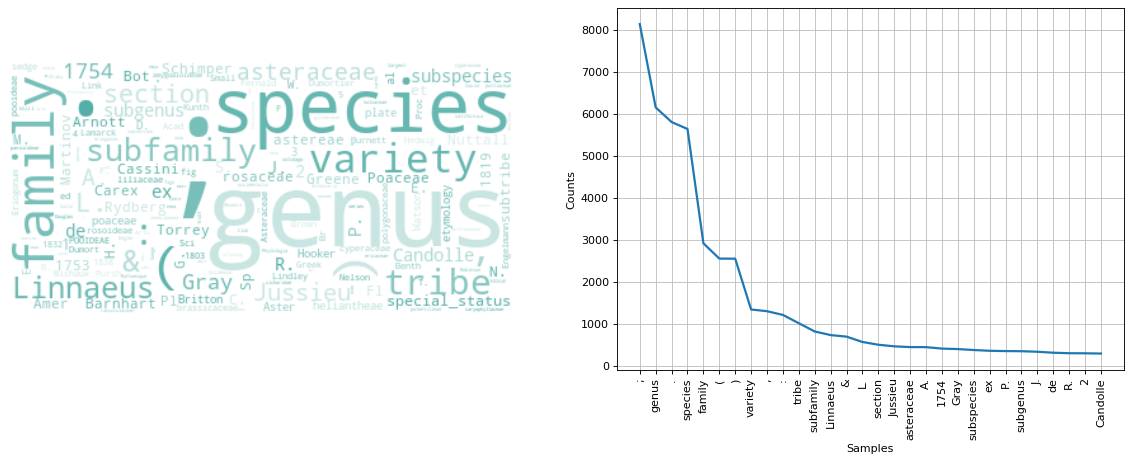

[(';', 8140), ('genus', 6155), ('.', 5807), ('species', 5642), ('family', 2919), ('(', 2554), (')', 2552), ('variety', 1342), (',', 1301), (':', 1212), ('tribe', 1015), ('subfamily', 818), ('Linnaeus', 732), ('&', 695), ('L.', 568), ('section', 502), ('Jussieu', 464), ('asteraceae', 446), ('A.', 445), ('1754', 410), ('Gray', 399), ('subspecies', 376), ('ex', 358), ('P.', 351), ('subgenus', 348), ('J.', 335), ('de', 312), ('R.', 300), ('2', 298), ('Candolle', 292)]


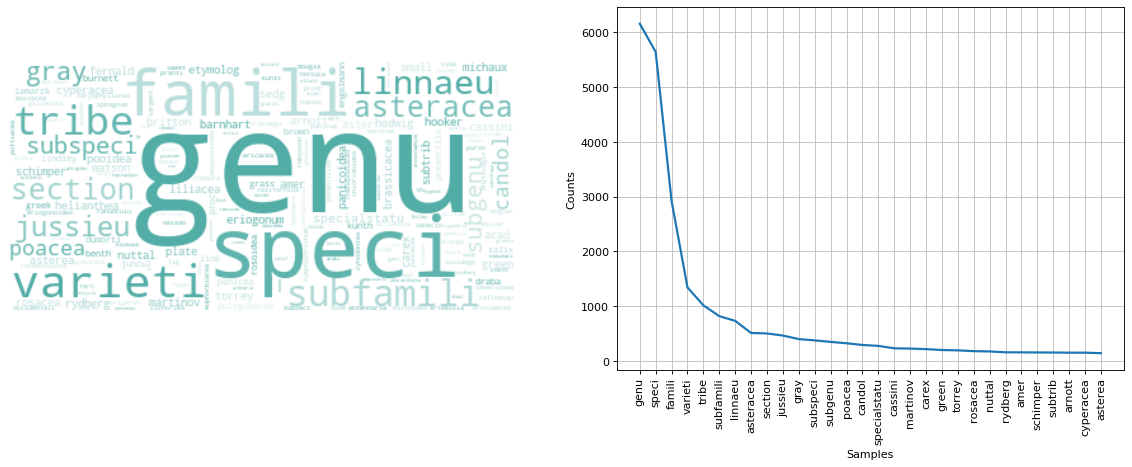

[('genu', 6157), ('speci', 5642), ('famili', 2919), ('varieti', 1342), ('tribe', 1015), ('subfamili', 818), ('linnaeu', 732), ('asteracea', 511), ('section', 502), ('jussieu', 464), ('gray', 399), ('subspeci', 376), ('subgenu', 348), ('poacea', 323), ('candol', 292), ('specialstatu', 275), ('cassini', 231), ('martinov', 226), ('carex', 216), ('green', 200), ('torrey', 194), ('rosacea', 179), ('nuttal', 174), ('rydberg', 158), ('amer', 157), ('schimper', 155), ('subtrib', 154), ('arnott', 151), ('cyperacea', 151), ('asterea', 142)]


In [75]:
visualize_words(taxon_identification, tokenized_stop_words, color="purple")
visualize_words(taxon_identification, tokenized_stop_words_clean, cleanup=True, color="purple")


Morphology

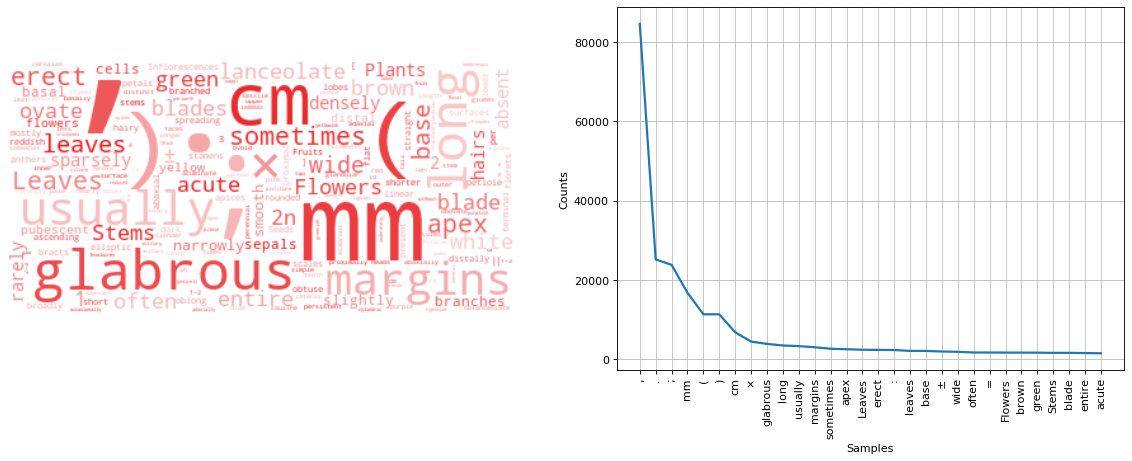

<Figure size 432x288 with 0 Axes>

[(',', 84615), ('.', 25195), (';', 23831), ('mm', 16788), ('(', 11357), (')', 11356), ('cm', 6812), ('×', 4472), ('glabrous', 3896), ('long', 3485), ('usually', 3335), ('margins', 3052), ('sometimes', 2664), ('apex', 2543), ('Leaves', 2419), ('erect', 2377), (':', 2348), ('leaves', 2126), ('base', 2121), ('±', 1970), ('wide', 1893), ('often', 1722), ('=', 1720), ('Flowers', 1699), ('brown', 1694), ('green', 1680), ('Stems', 1635), ('blade', 1634), ('entire', 1580), ('acute', 1519)]


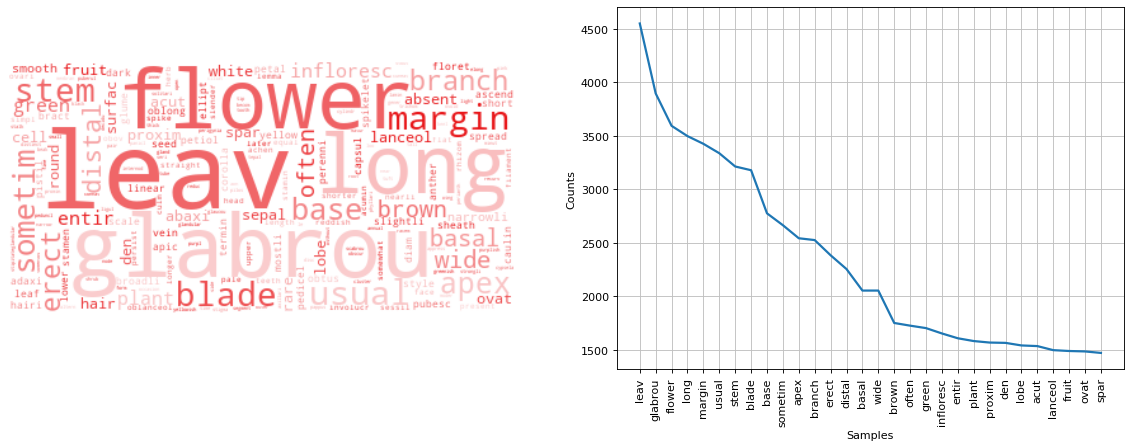

<Figure size 432x288 with 0 Axes>

[('leav', 4551), ('glabrou', 3897), ('flower', 3594), ('long', 3498), ('margin', 3426), ('usual', 3338), ('stem', 3214), ('blade', 3179), ('base', 2776), ('sometim', 2665), ('apex', 2543), ('branch', 2526), ('erect', 2384), ('distal', 2255), ('basal', 2054), ('wide', 2054), ('brown', 1751), ('often', 1726), ('green', 1703), ('infloresc', 1653), ('entir', 1608), ('plant', 1582), ('proxim', 1568), ('den', 1565), ('lobe', 1541), ('acut', 1535), ('lanceol', 1497), ('fruit', 1489), ('ovat', 1485), ('spar', 1471)]


In [7]:
visualize_words(morphology, tokenized_stop_words, color="red")
visualize_words(morphology, tokenized_stop_words_clean, cleanup=True, color="red")

Keys

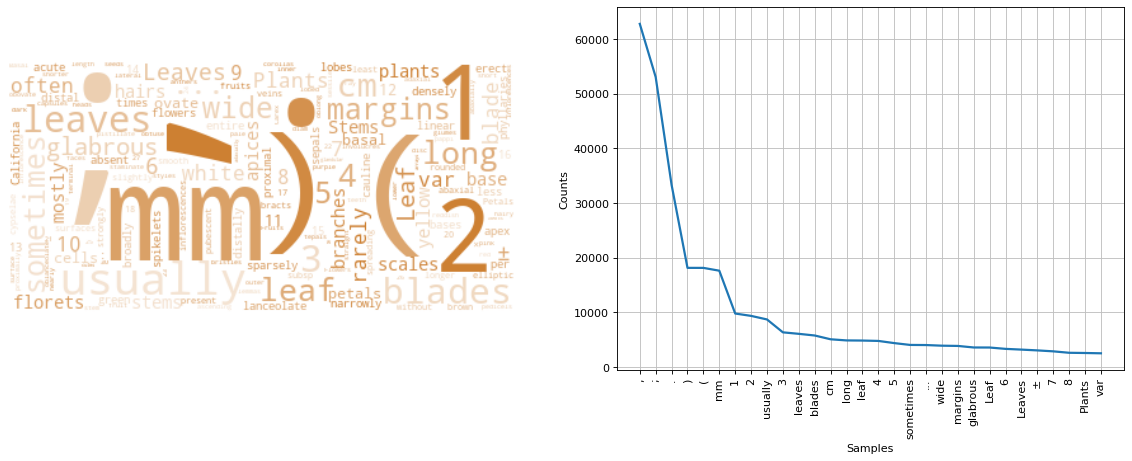

<Figure size 432x288 with 0 Axes>

[(',', 62779), (';', 53047), ('.', 33329), (')', 18148), ('(', 18144), ('mm', 17630), ('1', 9795), ('2', 9364), ('usually', 8712), ('3', 6354), ('leaves', 6081), ('blades', 5777), ('cm', 5084), ('long', 4877), ('leaf', 4852), ('4', 4785), ('5', 4387), ('sometimes', 4052), ('...', 4030), ('wide', 3913), ('margins', 3869), ('glabrous', 3586), ('Leaf', 3578), ('6', 3331), ('Leaves', 3197), ('±', 3052), ('7', 2879), ('8', 2615), ('Plants', 2577), ('var', 2520)]


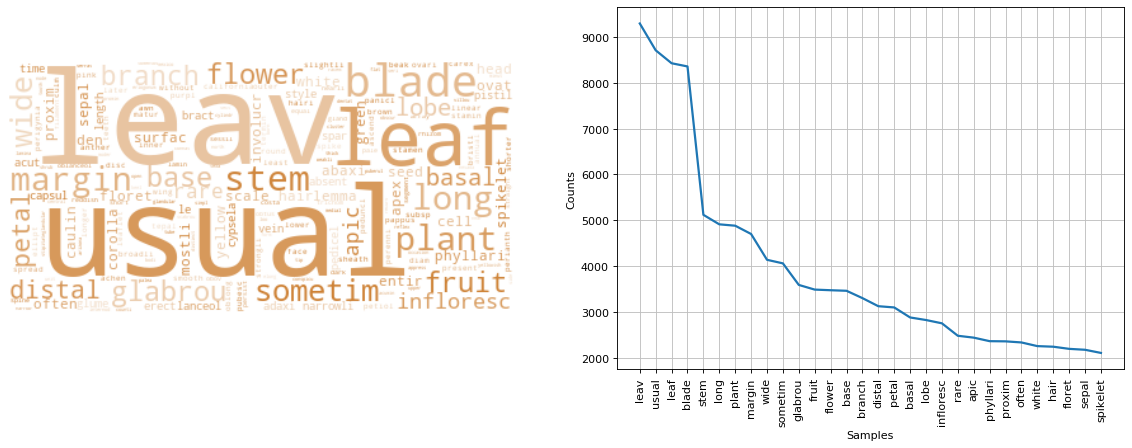

<Figure size 432x288 with 0 Axes>

[('leav', 9299), ('usual', 8713), ('leaf', 8430), ('blade', 8360), ('stem', 5118), ('long', 4910), ('plant', 4880), ('margin', 4699), ('wide', 4135), ('sometim', 4057), ('glabrou', 3586), ('fruit', 3484), ('flower', 3470), ('base', 3458), ('branch', 3298), ('distal', 3121), ('petal', 3094), ('basal', 2875), ('lobe', 2819), ('infloresc', 2747), ('rare', 2475), ('apic', 2434), ('phyllari', 2357), ('proxim', 2353), ('often', 2329), ('white', 2249), ('hair', 2236), ('floret', 2189), ('sepal', 2169), ('spikelet', 2100)]


In [8]:
visualize_words(key, tokenized_stop_words, color="yellow")
visualize_words(key, tokenized_stop_words_clean, cleanup=True, color="yellow")

Habitat

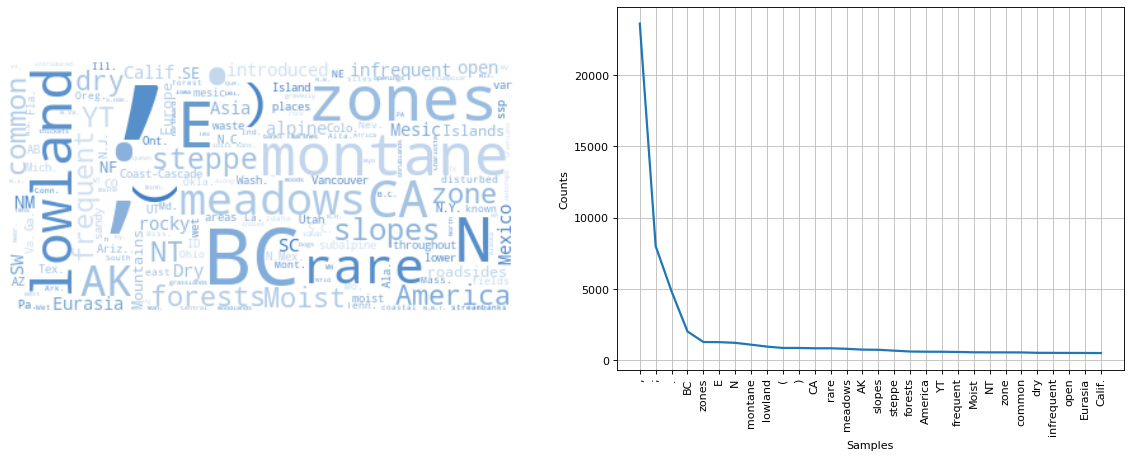

[(',', 23574), (';', 7999), ('.', 4832), ('BC', 2029), ('zones', 1291), ('E', 1282), ('N', 1234), ('montane', 1104), ('lowland', 969), ('(', 875), (')', 875), ('CA', 852), ('rare', 852), ('meadows', 815), ('AK', 759), ('slopes', 746), ('steppe', 686), ('forests', 626), ('America', 612), ('YT', 609), ('frequent', 594), ('Moist', 571), ('NT', 566), ('zone', 565), ('common', 562), ('dry', 535), ('infrequent', 531), ('open', 526), ('Eurasia', 523), ('Calif.', 518)]


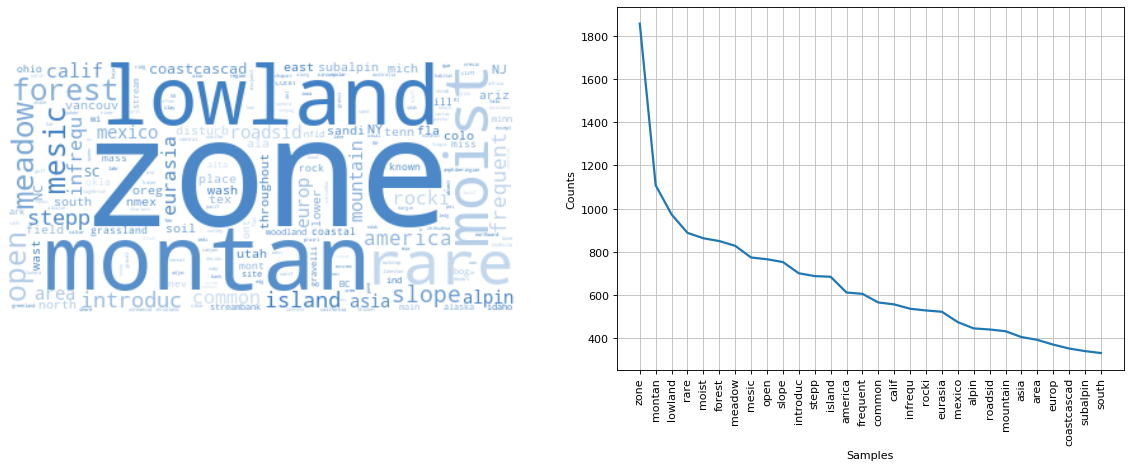

[('zone', 1856), ('montan', 1108), ('lowland', 973), ('rare', 888), ('moist', 863), ('forest', 850), ('meadow', 828), ('mesic', 774), ('open', 766), ('slope', 753), ('introduc', 701), ('stepp', 688), ('island', 685), ('america', 612), ('frequent', 606), ('common', 566), ('calif', 557), ('infrequ', 537), ('rocki', 529), ('eurasia', 523), ('mexico', 475), ('alpin', 446), ('roadsid', 441), ('mountain', 433), ('asia', 406), ('area', 393), ('europ', 371), ('coastcascad', 353), ('subalpin', 341), ('south', 332)]


In [74]:
visualize_words(habitat, tokenized_stop_words, color="blue")
visualize_words(habitat, tokenized_stop_words_clean, cleanup=True, color="blue")

### Word clouds by flora source
Are there differences between training sets in the most commonly used words?

In [10]:
bc_text = " ".join(text_string for text_string in flora_data_frame[flora_data_frame.dataset_name == 'bc'].text if text_string not in tokenized_stop_words)
budds_text = " ".join(text_string for text_string in flora_data_frame[flora_data_frame.dataset_name == 'budds'].text if text_string not in tokenized_stop_words)
fna_text = " ".join(text_string for text_string in flora_data_frame[flora_data_frame.dataset_name == 'fna'].text if text_string not in tokenized_stop_words)


BC

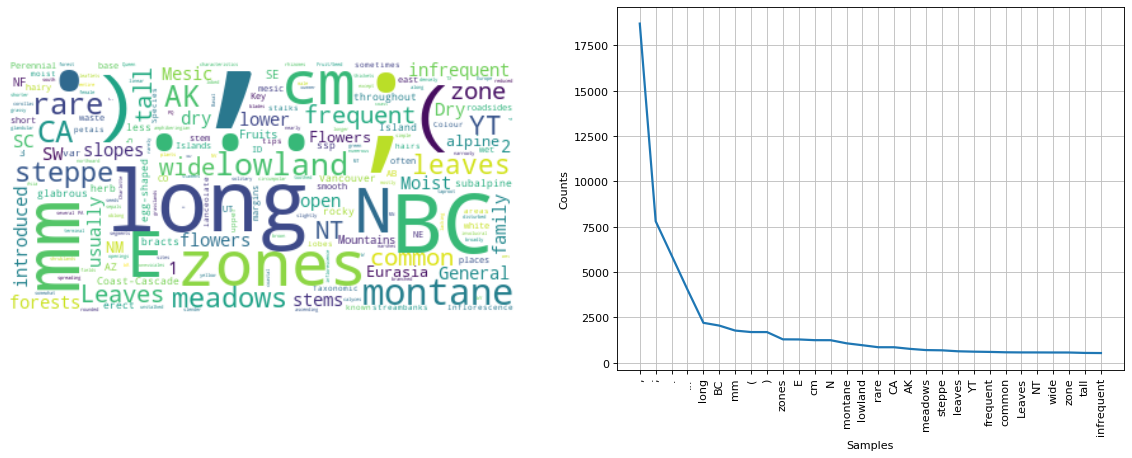

<Figure size 432x288 with 0 Axes>

[(',', 18704), (';', 7803), ('.', 5922), ('...', 4030), ('long', 2200), ('BC', 2047), ('mm', 1772), ('(', 1690), (')', 1689), ('zones', 1288), ('E', 1283), ('cm', 1243), ('N', 1241), ('montane', 1070), ('lowland', 964), ('rare', 853), ('CA', 852), ('AK', 762), ('meadows', 696), ('steppe', 683), ('leaves', 630), ('YT', 609), ('frequent', 595), ('common', 574), ('Leaves', 567), ('NT', 566), ('wide', 563), ('zone', 562), ('tall', 539), ('infrequent', 532)]


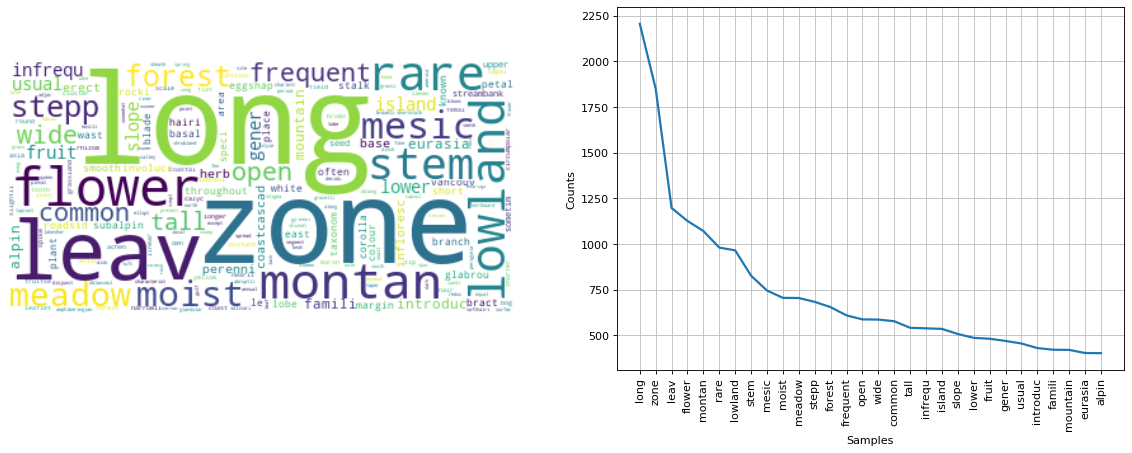

<Figure size 432x288 with 0 Axes>

[('long', 2206), ('zone', 1850), ('leav', 1197), ('flower', 1126), ('montan', 1071), ('rare', 980), ('lowland', 965), ('stem', 826), ('mesic', 745), ('moist', 705), ('meadow', 704), ('stepp', 683), ('forest', 654), ('frequent', 609), ('open', 587), ('wide', 586), ('common', 577), ('tall', 541), ('infrequ', 538), ('island', 535), ('slope', 507), ('lower', 486), ('fruit', 481), ('gener', 469), ('usual', 455), ('introduc', 430), ('famili', 421), ('mountain', 420), ('eurasia', 403), ('alpin', 402)]


In [11]:
visualize_words(bc_text, tokenized_stop_words)
visualize_words(bc_text, tokenized_stop_words_clean, cleanup=True)

FNA

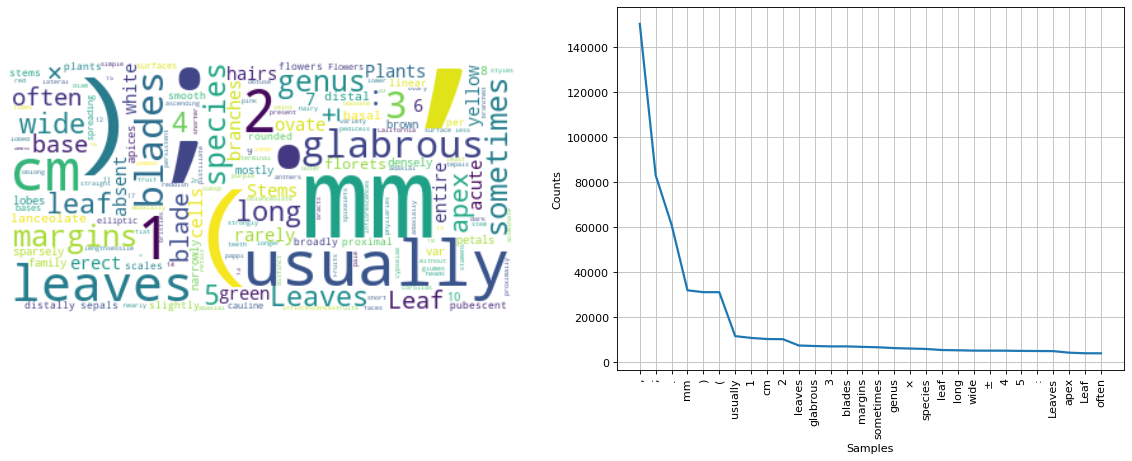

<Figure size 432x288 with 0 Axes>

[(',', 150526), (';', 83101), ('.', 61063), ('mm', 31884), (')', 31061), ('(', 31060), ('usually', 11494), ('1', 10693), ('cm', 10201), ('2', 10134), ('leaves', 7314), ('glabrous', 7083), ('3', 6917), ('blades', 6914), ('margins', 6712), ('sometimes', 6523), ('genus', 6160), ('×', 5961), ('species', 5781), ('leaf', 5295), ('long', 5182), ('wide', 5037), ('±', 5023), ('4', 5011), ('5', 4906), (':', 4865), ('Leaves', 4810), ('apex', 4125), ('Leaf', 3857), ('often', 3842)]


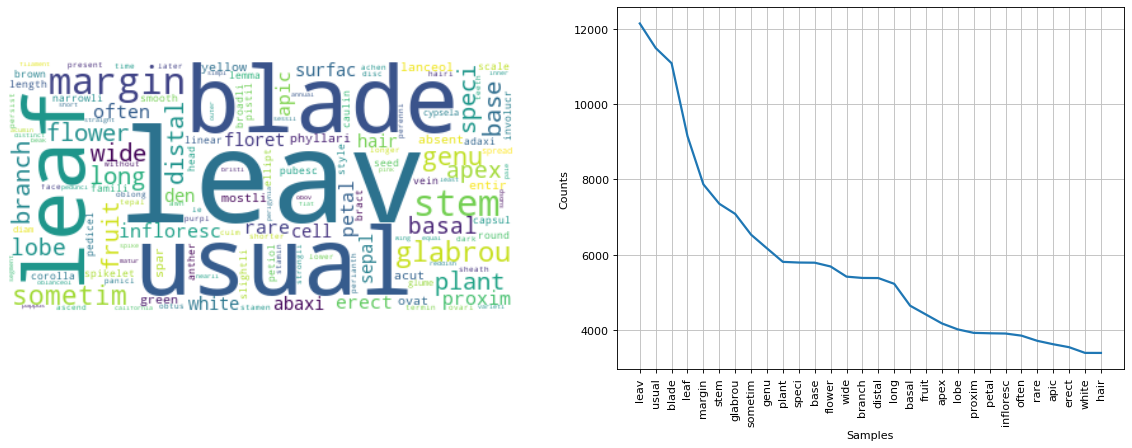

<Figure size 432x288 with 0 Axes>

[('leav', 12150), ('usual', 11497), ('blade', 11092), ('leaf', 9152), ('margin', 7869), ('stem', 7353), ('glabrou', 7083), ('sometim', 6530), ('genu', 6166), ('plant', 5807), ('speci', 5789), ('base', 5785), ('flower', 5684), ('wide', 5414), ('branch', 5379), ('distal', 5376), ('long', 5223), ('basal', 4641), ('fruit', 4405), ('apex', 4169), ('lobe', 4010), ('proxim', 3918), ('petal', 3907), ('infloresc', 3900), ('often', 3844), ('rare', 3706), ('apic', 3615), ('erect', 3536), ('white', 3385), ('hair', 3384)]


In [12]:
visualize_words(fna_text, tokenized_stop_words)
visualize_words(fna_text, tokenized_stop_words_clean, cleanup=True)

Budds

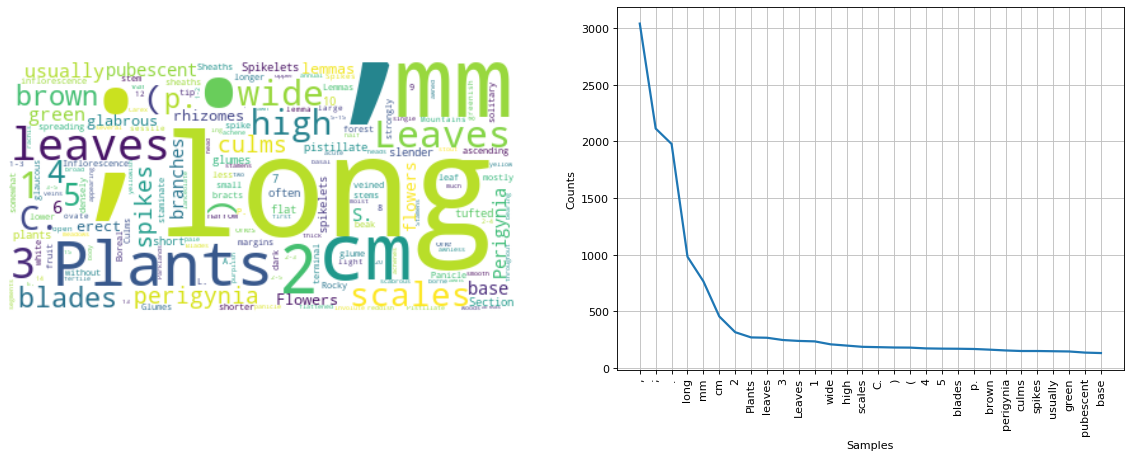

<Figure size 432x288 with 0 Axes>

[(',', 3039), (';', 2113), ('.', 1977), ('long', 982), ('mm', 765), ('cm', 455), ('2', 316), ('Plants', 270), ('leaves', 267), ('3', 247), ('Leaves', 239), ('1', 235), ('wide', 209), ('high', 198), ('scales', 187), ('C.', 184), (')', 181), ('(', 180), ('4', 173), ('5', 171), ('blades', 170), ('p.', 168), ('brown', 162), ('perigynia', 155), ('culms', 150), ('spikes', 150), ('usually', 148), ('green', 146), ('pubescent', 136), ('base', 132)]


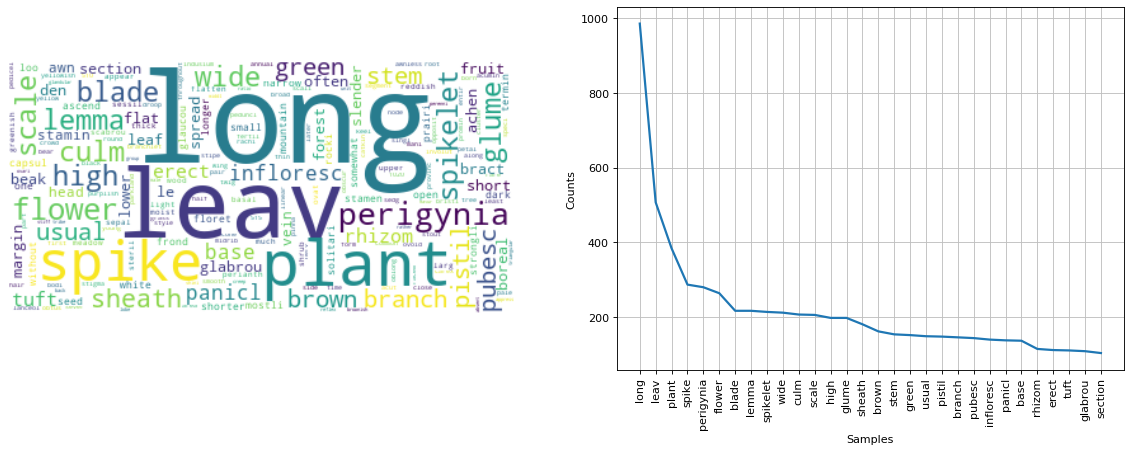

<Figure size 432x288 with 0 Axes>

[('long', 985), ('leav', 507), ('plant', 384), ('spike', 287), ('perigynia', 280), ('flower', 264), ('blade', 217), ('lemma', 217), ('spikelet', 214), ('wide', 212), ('culm', 207), ('scale', 206), ('high', 198), ('glume', 198), ('sheath', 181), ('brown', 162), ('stem', 154), ('green', 152), ('usual', 149), ('pistil', 148), ('branch', 146), ('pubesc', 144), ('infloresc', 140), ('panicl', 138), ('base', 137), ('rhizom', 115), ('erect', 112), ('tuft', 111), ('glabrou', 109), ('section', 104)]


In [13]:
visualize_words(budds_text, tokenized_stop_words)
visualize_words(budds_text, tokenized_stop_words_clean, cleanup=True)

### Visualize distinctive words using tf-idf


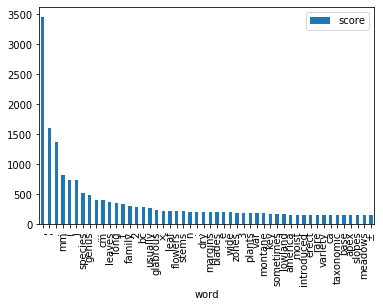

In [14]:
custom_vec = TfidfVectorizer(lowercase=True, tokenizer=features.flora_tokenizer, stop_words=tokenized_stop_words, ngram_range=(1, 1))
text_counts = custom_vec.fit_transform(flora_data_frame['text'])  # Build TF-IDF Matrix

scores = zip(custom_vec.get_feature_names(), np.asarray(text_counts.sum(axis=0)).ravel())
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
#for item in sorted_scores:
 #   print("{0:10} Score: {1}".format(item[0], item[1]))
    
sorted_scores_df = pd.DataFrame(sorted_scores, columns=['word', 'score']).iloc[:50]
sorted_scores_df.plot.bar(x='word', y='score')
plt.show()

Distinctive words with new cleaning regime

/Users/jocelynpender/miniconda3/envs/flora-prepper/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['becau'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


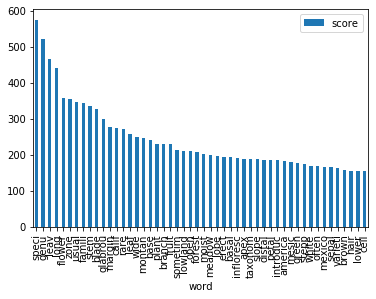

In [15]:
custom_vec = TfidfVectorizer(lowercase=True, tokenizer=features.flora_tokenizer_clean, stop_words=tokenized_stop_words_clean, ngram_range=(1, 1))
text_counts = custom_vec.fit_transform(flora_data_frame['text'])  # Build TF-IDF Matrix

scores = zip(custom_vec.get_feature_names(), np.asarray(text_counts.sum(axis=0)).ravel())
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
#for item in sorted_scores:
 #   print("{0:10} Score: {1}".format(item[0], item[1]))
    
sorted_scores_df = pd.DataFrame(sorted_scores, columns=['word', 'score']).iloc[:50]
sorted_scores_df.plot.bar(x='word', y='score')
plt.show()

## Run a DTM based model and a TFIDF based model and review accuracy

In [16]:
# ==== DTM =====
custom_vec, dtm_text_counts = build_dtm_text_counts(features.flora_tokenizer, tokenized_stop_words, flora_data_frame)
dtm_y_test, dtm_predictions = run_model(dtm_text_counts, flora_data_frame, feature_rank=True, custom_vec)

# ==== TFIDF =====
custom_vec, tfidf_text_counts = build_tfidf_text_counts(features.flora_tokenizer, tokenized_stop_words, flora_data_frame)
tfidf_y_test, tfidf_predictions = run_model(tfidf_text_counts, flora_data_frame, feature_rank=True, custom_vec)


MultinomialNB Accuracy: 0.9792351617926977
                      precision    recall  f1-score   support

             habitat       0.99      1.00      0.99      1515
                 key       0.98      0.96      0.97      1267
          morphology       0.96      0.98      0.97      1532
taxon_identification       0.99      0.98      0.99      1465

            accuracy                           0.98      5779
           macro avg       0.98      0.98      0.98      5779
        weighted avg       0.98      0.98      0.98      5779

habitat: lowland dry montane zones e n bc . ; ,
key: 2 usually 1 leaves ( ) mm . ; ,
morphology: glabrous × leaves cm ) ( mm ; . ,
taxon_identification: : , variety ) ( family . species genus ;
MultinomialNB Accuracy: 0.9223048970410106
                      precision    recall  f1-score   support

             habitat       0.98      1.00      0.99      1515
                 key       0.98      0.69      0.81      1267
          morphology       0.79   

#### View classified statements

In [17]:
dtm_y_test_df = pd.DataFrame(dtm_y_test).reset_index()
dtm_predictions_series = pd.Series(dtm_predictions)
results = pd.concat([dtm_y_test_df, dtm_predictions_series], axis=1)
results.rename(columns={0: 'predictions'}, inplace=True)
results = results.set_index('index')
results_flora_data_frame = pd.concat([results, flora_data_frame], axis=1)
results_flora_data_frame

,classification,predictions,dataset_name,row_id,classification,length,row,species,text
0,habitat,habitat,bc,5721,habitat,267,NaN,Festuca saximontana var. saximontana,"Mesic to dry meadows, grasslands, rocky slopes..."
1,NaN,NaN,fna,9819,habitat,78,NaN,NaN,"Rock, outcrops, calcareous and volcanic boulde..."
2,NaN,NaN,bc,2305,morphology,27,NaN,Epilobium glaberrimum,Blooming Period Mid Summer
3,NaN,NaN,fna,6636,taxon_identification,251,NaN,NaN,asteraceae family Martinov unknown senecioneae...
4,habitat,habitat,bc,7239,habitat,194,NaN,Aquilegia formosa,"Mesic to moist meadows, rocky slopes, thickets..."
...,...,...,...,...,...,...,...,...,...
19257,habitat,habitat,fna,11209,habitat,26,NaN,NaN,"B.C.; Calif., Oreg., Wash."
19258,NaN,NaN,fna,10509,habitat,113,NaN,NaN,"Mineral-and nutrient-rich wetlands, eutrophic ..."
19259,NaN,NaN,fna,2221,key,653,NaN,NaN,"1 Sepals narrowly lanceolate, with silky hairs..."
19260,NaN,NaN,fna,11968,habitat,159,NaN,NaN,"Loose talus, metamorphic slide rock, rocky slo..."


In [18]:
incorrect = results[results.classification != results.predictions]
incorrect_data_frame = results_flora_data_frame.iloc[incorrect.index]
incorrect_data_frame.to_csv(path_or_buf = "../reports/incorrect_dtm_clean.csv")
incorrect_data_frame

,classification,predictions,dataset_name,row_id,classification,length,row,species,text
16024,key,morphology,fna,2635,key,286,NaN,NaN,"1 Leaves not densely crowded, blade linear, te..."
7491,key,morphology,bc,1803,key,11,NaN,NaN,
17135,key,morphology,fna,419,key,793,NaN,NaN,"1 Calyptra minute, tightly adherent at or near..."
1698,taxon_identification,habitat,bc,3748,taxon_identification,42,NaN,Cardamine bellidifolia,Alpine Bittercress (alpine bitter-cress)
3931,taxon_identification,morphology,bc,4807,taxon_identification,14,NaN,Geum aleppicum,yellow avens
...,...,...,...,...,...,...,...,...,...
2677,taxon_identification,morphology,bc,5350,taxon_identification,21,NaN,Rorippa palustris ssp. hispida,hispid yellow cress
14720,key,morphology,fna,1441,key,271,NaN,NaN,"1 Shrubs 1–4 dm; leaves 5–20 × 2–4 mm, usually..."
15500,key,morphology,fna,1597,key,384,NaN,NaN,1 Plants 3–7 cm (forming dense clumps and mats...
7999,key,morphology,fna,1392,key,527,NaN,NaN,"1 Heads borne singly, from axils of primary le..."


### Run with strict cleaning regime

In [19]:
# ==== DTM =====
custom_vec, dtm_text_counts = build_dtm_text_counts(features.flora_tokenizer_clean, tokenized_stop_words_clean, flora_data_frame)
dtm_y_test, dtm_predictions = run_model(dtm_text_counts, flora_data_frame, feature_rank=True, custom_vec)

# ==== TFIDF =====
custom_vec, tfidf_text_counts = build_tfidf_text_counts(features.flora_tokenizer_clean, tokenized_stop_words_clean, flora_data_frame)
tfidf_y_test, tfidf_predictions = run_model(tfidf_text_counts, flora_data_frame, feature_rank=True, custom_vec)


/Users/jocelynpender/miniconda3/envs/flora-prepper/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['becau'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


MultinomialNB Accuracy: 0.9153832843052431
                      precision    recall  f1-score   support

             habitat       0.96      0.98      0.97      1515
                 key       0.90      0.77      0.83      1267
          morphology       0.85      0.93      0.89      1532
taxon_identification       0.95      0.96      0.95      1465

            accuracy                           0.92      5779
           macro avg       0.92      0.91      0.91      5779
        weighted avg       0.92      0.92      0.91      5779

habitat: open slope mesic meadow moist forest rare lowland montan zone
key: sometim wide margin plant long stem blade leaf usual leav
morphology: sometim base blade stem usual margin long flower glabrou leav
taxon_identification: jussieu asteracea section linnaeu subfamili tribe varieti famili speci genu


/Users/jocelynpender/miniconda3/envs/flora-prepper/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['becau'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


MultinomialNB Accuracy: 0.8610486243294687
                      precision    recall  f1-score   support

             habitat       0.98      0.98      0.98      1515
                 key       0.96      0.44      0.61      1267
          morphology       0.67      0.99      0.80      1532
taxon_identification       0.99      0.96      0.98      1465

            accuracy                           0.86      5779
           macro avg       0.90      0.84      0.84      5779
        weighted avg       0.90      0.86      0.85      5779

habitat: introduc mesic moist meadow slope forest lowland montan calif zone
key: speci petal stem plant long blade usual taxonom leaf leav
morphology: branch erect usual margin blade glabrou stem flower leav long
taxon_identification: sedg poacea linnaeu subfamili asteracea tribe varieti famili speci genu


In [20]:
dtm_y_test_df = pd.DataFrame(dtm_y_test).reset_index()
dtm_predictions_series = pd.Series(dtm_predictions)
results = pd.concat([dtm_y_test_df, dtm_predictions_series], axis=1)
results.rename(columns={0: 'predictions'}, inplace=True)
results = results.set_index('index')
results_flora_data_frame = pd.concat([results, flora_data_frame], axis=1)
results_flora_data_frame

,classification,predictions,dataset_name,row_id,classification,length,row,species,text
0,habitat,habitat,bc,5721,habitat,267,NaN,Festuca saximontana var. saximontana,"Mesic to dry meadows, grasslands, rocky slopes..."
1,NaN,NaN,fna,9819,habitat,78,NaN,NaN,"Rock, outcrops, calcareous and volcanic boulde..."
2,NaN,NaN,bc,2305,morphology,27,NaN,Epilobium glaberrimum,Blooming Period Mid Summer
3,NaN,NaN,fna,6636,taxon_identification,251,NaN,NaN,asteraceae family Martinov unknown senecioneae...
4,habitat,habitat,bc,7239,habitat,194,NaN,Aquilegia formosa,"Mesic to moist meadows, rocky slopes, thickets..."
...,...,...,...,...,...,...,...,...,...
19257,habitat,habitat,fna,11209,habitat,26,NaN,NaN,"B.C.; Calif., Oreg., Wash."
19258,NaN,NaN,fna,10509,habitat,113,NaN,NaN,"Mineral-and nutrient-rich wetlands, eutrophic ..."
19259,NaN,NaN,fna,2221,key,653,NaN,NaN,"1 Sepals narrowly lanceolate, with silky hairs..."
19260,NaN,NaN,fna,11968,habitat,159,NaN,NaN,"Loose talus, metamorphic slide rock, rocky slo..."


In [21]:
incorrect = results[results.classification != results.predictions]
incorrect_data_frame = results_flora_data_frame.iloc[incorrect.index]
incorrect_data_frame.to_csv(path_or_buf = "../reports/incorrect_dtm_dirty.csv")
incorrect_data_frame

,classification,predictions,dataset_name,row_id,classification,length,row,species,text
7491,key,morphology,bc,1803,key,11,NaN,NaN,
2590,morphology,key,bc,1997,morphology,98,NaN,Cirsium brevistylum,Fruits Achenes 4-4.5 mm long; pappus 18-22 mm ...
17135,key,morphology,fna,419,key,793,NaN,NaN,"1 Calyptra minute, tightly adherent at or near..."
11288,habitat,morphology,fna,12350,habitat,4,NaN,NaN,Tex.
506,key,morphology,fna,1436,key,1042,NaN,NaN,1 Leaves alternate and clustered on short shoo...
...,...,...,...,...,...,...,...,...,...
8942,morphology,key,fna,5855,morphology,596,NaN,NaN,"Plants 20–90 cm. Basal leaves: blades green, d..."
7002,key,morphology,fna,2187,key,434,NaN,NaN,1 Raceme 1-sided; flowers all becoming pendent...
2742,key,morphology,fna,2508,key,396,NaN,NaN,"1 Plants with opposite, dissected, submersed l..."
18295,key,morphology,fna,1795,key,1853,NaN,NaN,1 Flowers appearing in late summer–fall. morph...


## Run a model based on text length

In [22]:
# Process text, remove stopwords. Remove empty cells.
length_processed_flora_data_frame = features.process_length_in_place(flora_data_frame, tokenized_stop_words)

In [72]:
length_processed_flora_data_frame.to_csv(path_or_buf = "../data/interim/length_processed_flora_data_frame.csv")

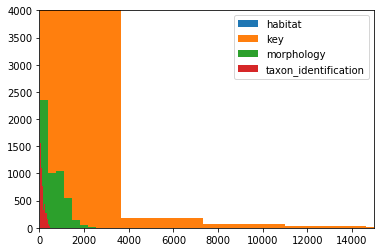

In [71]:
classifications = length_processed_flora_data_frame.groupby(by=length_processed_flora_data_frame['classification'])

#bins = np.linspace(-10, 10, 100)

for group in classifications.groups:
#   print(group)
    group_df = length_processed_flora_data_frame[length_processed_flora_data_frame.classification == group]
    group_text_length = group_df['length']
    plt.hist(group_text_length, label=group)
#file_name = group + "_text_length.png"
#print(file_name)
#plt.savefig(file_name)
plt.xlim(0, 15000)
plt.ylim(0, 4000)
plt.legend(loc='upper right')
plt.show()

    
    # TO DO 
    
    # redo these as overlapping hist with four colours!!!

It looks like discussion should be removed from the dataset. It is curiously short in length. This may be an artifact from the bc dataset.

In [27]:
length_custom_vec = CountVectorizer(lowercase=True, tokenizer=features.flora_tokenizer, stop_words=tokenized_stop_words,
                                 ngram_range=(1, 1))
length_text_counts = length_custom_vec.fit_transform(length_processed_flora_data_frame['text'])

length_model_sparse = features.prepare_length_features(length_text_counts, length_custom_vec, length_processed_flora_data_frame)

X_test, predicted = run_model(length_model_sparse, length_processed_flora_data_frame, feature_rank=False)

MultinomialNB Accuracy: 0.9802494802494802
                      precision    recall  f1-score   support

             habitat       0.99      0.99      0.99      1503
                 key       0.97      0.96      0.97      1341
          morphology       0.96      0.98      0.97      1525
taxon_identification       0.99      0.98      0.99      1403

            accuracy                           0.98      5772
           macro avg       0.98      0.98      0.98      5772
        weighted avg       0.98      0.98      0.98      5772



To do plots:
classification coloured by source

## Run a model with only the most frequently occurring words

In [28]:
all_text = " ".join(text_string for text_string in flora_data_frame.text)
all_text = features.flora_tokenizer(all_text)
top_words_text = features.find_most_frequent_words(all_text, threshold=2000)
top_words_flora_data_frame = features.filter_data_frame_top_words(flora_data_frame, top_words_text, tokenized_stop_words)
top_words_flora_data_frame

,dataset_name,row_id,classification,length,row,species,text
0,bc,5721,habitat,267,NaN,Festuca saximontana var. saximontana,"mesic dry meadows, grasslands, rocky slopes ri..."
1,fna,9819,habitat,78,NaN,NaN,"rock, outcrops, calcareous, fields, cliffs, areas"
2,bc,2305,morphology,27,NaN,Epilobium glaberrimum,blooming period mid summer
3,fna,6636,taxon_identification,251,NaN,NaN,asteraceae family martinov tribe cassini 1819 ...
4,bc,7239,habitat,194,NaN,Aquilegia formosa,"mesic moist meadows, rocky slopes, thickets, c..."
...,...,...,...,...,...,...,...
19257,fna,11209,habitat,26,NaN,NaN,"b.c .; calif., oreg. ,."
19258,fna,10509,habitat,113,NaN,NaN,", fens, shores, ditches, lakes, forests"
19259,fna,2221,key,653,NaN,NaN,"1 sepals narrowly lanceolate, hairs 1–1.5 mm; ..."
19260,fna,11968,habitat,159,NaN,NaN,"loose talus, rock, rocky slopes, scree, , lime..."


In [30]:
all_text_custom_vec = CountVectorizer(lowercase=True, tokenizer=features.flora_tokenizer, stop_words=tokenized_stop_words,
                                 ngram_range=(1, 1))
all_text_counts = all_text_custom_vec.fit_transform(top_words_flora_data_frame['text'])
X_test, predicted = run_model(all_text_counts, top_words_flora_data_frame, feature_rank=False)

MultinomialNB Accuracy: 0.953452154351964
                      precision    recall  f1-score   support

             habitat       0.99      0.95      0.97      1515
                 key       0.96      0.96      0.96      1267
          morphology       0.92      0.97      0.95      1532
taxon_identification       0.95      0.93      0.94      1465

            accuracy                           0.95      5779
           macro avg       0.95      0.95      0.95      5779
        weighted avg       0.95      0.95      0.95      5779



## Do models work well on previously unseen floras?

In [42]:
custom_vec, dtm_text_counts = build_dtm_text_counts(features.flora_tokenizer, tokenized_stop_words, flora_data_frame)

In [45]:
dtm_text_counts.toarray()
print(dtm_text_counts.shape)
print(flora_data_frame.shape)

(19262, 40339)
(19262, 7)


In [59]:
train_indices = flora_data_frame[(flora_data_frame['dataset_name'] =="bc") | (flora_data_frame['dataset_name'] == "fna")].index
X_train = dtm_text_counts[train_indices]
y_train = flora_data_frame.iloc[train_indices].classification
print(X_train.shape)
print(len(y_train))
test_indices = flora_data_frame[flora_data_frame['dataset_name'] =="budds"].index
print(len(test_indices))
X_test = dtm_text_counts[test_indices]
y_test = flora_data_frame.iloc[test_indices].classification


(18710, 40339)
18710
552


In [60]:
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))
class_labels = clf.classes_
print_top10(custom_vec, clf, class_labels)

MultinomialNB Accuracy: 0.802536231884058
                      precision    recall  f1-score   support

             habitat       0.00      0.00      0.00         0
                 key       0.67      0.95      0.78       184
          morphology       0.90      0.49      0.63       184
taxon_identification       0.98      0.97      0.97       184

            accuracy                           0.80       552
           macro avg       0.64      0.60      0.60       552
        weighted avg       0.85      0.80      0.80       552

habitat: lowland dry montane zones e n bc . ; ,
key: usually leaves 2 1 mm ( ) . ; ,
morphology: glabrous leaves × cm ) ( mm ; . ,
taxon_identification: : , variety ) ( family species . genus ;


/Users/jocelynpender/miniconda3/envs/flora-prepper/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [63]:
dtm_y_test_df = pd.DataFrame(y_test).reset_index()
dtm_predictions_series = pd.Series(predicted)
results = pd.concat([dtm_y_test_df, dtm_predictions_series], axis=1)
results.rename(columns={0: 'predictions'}, inplace=True)
results = results.set_index('index')
results_flora_data_frame = pd.concat([results, flora_data_frame], axis=1, join='inner')
results_flora_data_frame

,classification,predictions,dataset_name,row_id,classification,length,row,species,text
9,key,key,budds,148,key,291,121.0,NaN,"1 . Perigynia 3-3.5 mm long, round; leaves sti..."
14,taxon_identification,taxon_identification,budds,384,taxon_identification,26,121.0,NaN,TYPHACEAE — cattail family
15,taxon_identification,taxon_identification,budds,441,taxon_identification,39,101.0,NaN,Pinus albicaulis Engelm . whitebark pine
111,taxon_identification,key,budds,517,taxon_identification,25,618.0,NaN,Spirodela larger duckweed
188,morphology,morphology,budds,306,morphology,534,35.0,NaN,"Plants scaly rhizomes; scales 4-6 mm long , 1-..."
...,...,...,...,...,...,...,...,...,...
18974,taxon_identification,taxon_identification,budds,491,taxon_identification,29,541.0,NaN,Carex salina Wahl . salt sedge
18980,key,key,budds,94,key,1064,0.0,NaN,"Keys main groups Key Divisions, Subdivisions, ..."
19031,taxon_identification,taxon_identification,budds,466,taxon_identification,94,85.0,NaN,Division: SPERMATOPHYTA — seed-bearing plants ...
19230,morphology,key,budds,327,morphology,375,334.0,NaN,"Plants densely tufted, culms 10-20 cm high, er..."


### Running a baseline model!

In [ ]:
baseprediction = zero_rule_algorithm_classification(line_features, labels)  # get predictions for baseline

    if baseprediction[0] == 0:
        baseline = (len(baseprediction) - np.count_nonzero(labels)) / (len(baseprediction))
    else:
        baseline = (len(baseprediction) - len(np.where(labels == 0))) / (len(baseprediction))

    print(f"Baseline score: {baseline}")